## Problem

For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")

### 1. Read the data as an appropriate Time Series data and plot the data.

In [4]:
df = pd.read_csv('Sparkling.csv')
df.head()

,YearMonth,Sparkling
0,1980-01,1686
1,1980-02,1591
2,1980-03,2304
3,1980-04,1712
4,1980-05,1471


In [5]:
df.dtypes

YearMonth    object
Sparkling     int64
dtype: object

In [6]:
df = pd.read_csv('Sparkling.csv', parse_dates = ['YearMonth'])

In [7]:
df.dtypes

YearMonth    datetime64[ns]
Sparkling             int64
dtype: object

In [8]:
df = pd.read_csv('Sparkling.csv', parse_dates = ['YearMonth'], index_col = 'YearMonth')

In [9]:
df.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


In [157]:
df.tail()

,Sparkling
YearMonth,
1995-03-01,1897
1995-04-01,1862
1995-05-01,1670
1995-06-01,1688
1995-07-01,2031


#### Plot the Time Series to understand the behaviour of the data.

In [10]:
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

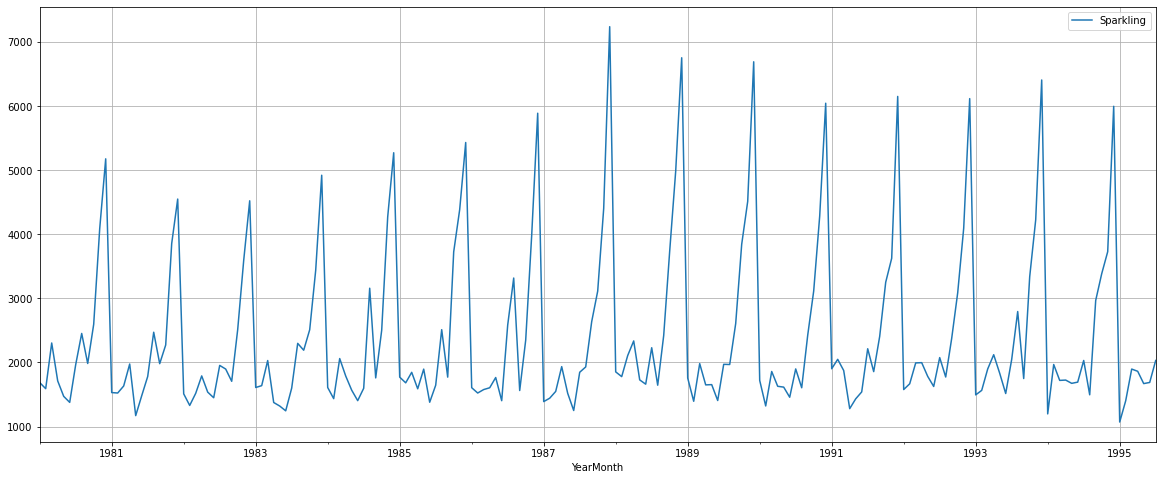

In [11]:
df.plot()
plt.grid();

The above time series plot seems to have seasonality but not much of trend.

### 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

#### Check the basic measures of descriptive statistics

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [13]:
df.shape

(187, 1)

In [14]:
df.isnull().sum()

Sparkling    0
dtype: int64

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sparkling,187.0,2402.417112,1295.11154,1070.0,1605.0,1874.0,2549.0,7242.0


The basic measures of descriptive statistics tell us how the Sales have varied across years. But remember, for this measure of descriptive statistics we have averaged over the whole data without taking the time component into account.

#### Plot a boxplot to understand the spread of Rose wine sales across different years and within different months across years.
#### Yearly Plot

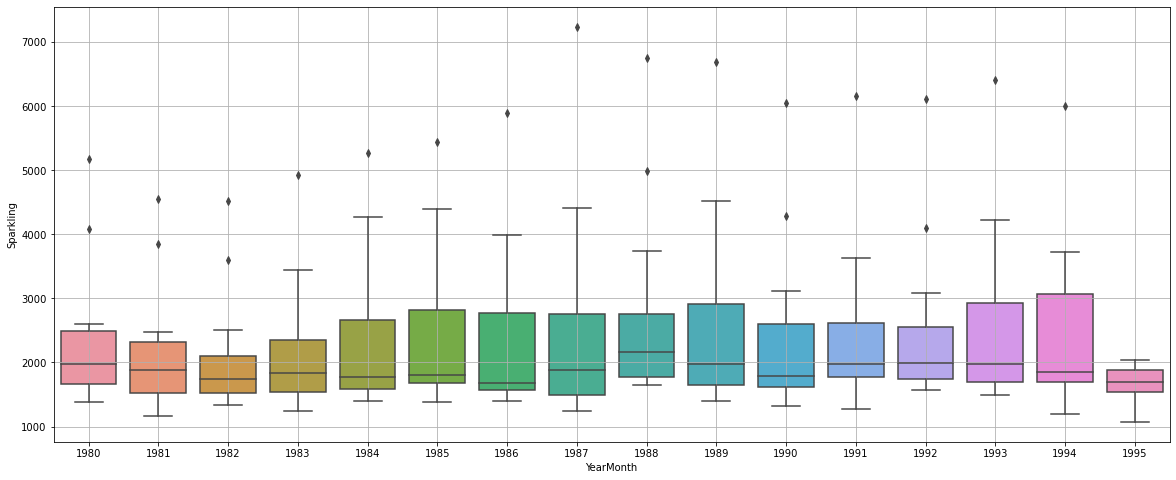

In [16]:
sns.boxplot(x = df.index.year,y = df['Sparkling'])
plt.grid();

The yearly boxplots shows that the Sales are more or less the same across 1984 to 1989 and the least in 1995.

#### Monthly Plot

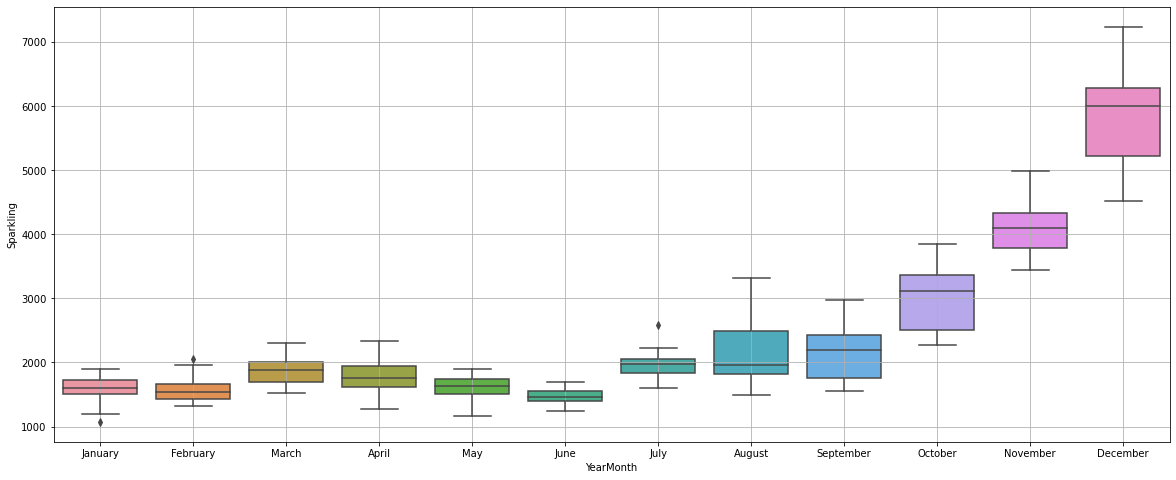

In [17]:
sns.boxplot(x = df.index.month_name(),y = df['Sparkling'])
plt.grid();

There is a clear distinction of 'Sparkling Sales' within different months spread across various years. The highest such numbers are being recorded in the month of December across various years.

In [18]:
from statsmodels.graphics.tsaplots import month_plot

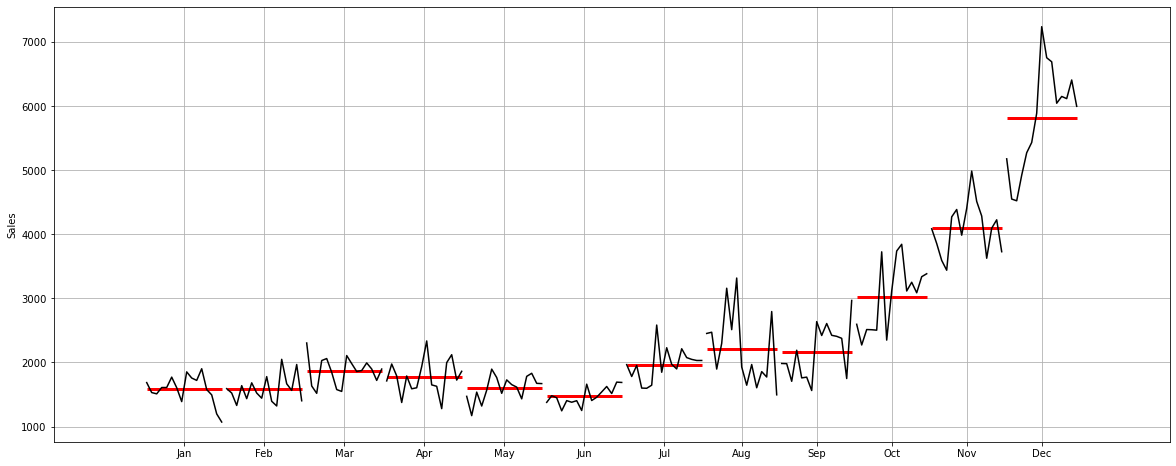

In [19]:
month_plot(df['Sparkling'],ylabel='Sales')
plt.grid();

This plot shows us the behaviour of the Time Series (Sales of Sparkling wine) across various months. The red line is the median value.

### Univariate Analysis

Text(0.5, 1.0, 'Sparkling sales')

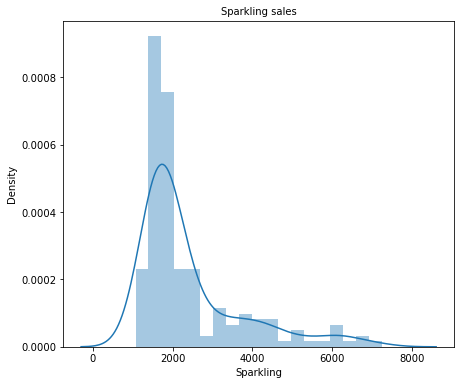

In [20]:
plt.figure(figsize=(7,6))
a = sns.distplot(df['Sparkling'])
a.set_title("Sparkling sales",fontsize=10)

From the above histogram, we can infer that the graph is right skewed

Text(0.5, 1.0, 'Sparkling sales')

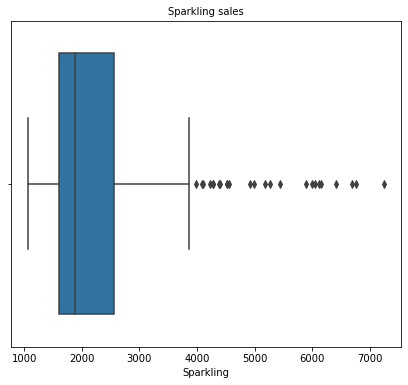

In [21]:
plt.figure(figsize=(7,6))
a = sns.boxplot(df['Sparkling'] , orient = "v")
a.set_title("Sparkling sales",fontsize=10)

From the above boxplot, we can see that there are a lot of outliers present in the data and the sales count ranges between 1000 to 4000.

In [22]:
df.skew(axis = 0, skipna = True)

Sparkling    1.817612
dtype: float64

Since the skewness value is greater than 1, it is right skewed.

#### Plot a graph of monthly RetailSales across years.

In [23]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Sparkling', columns = df.index.month, index = df.index.year)
monthly_sales_across_years.head()

YearMonth,1,2,3,4,5,6,7,8,9,10,11,12
YearMonth,,,,,,,,,,,,
1980,1686.0,1591.0,2304.0,1712.0,1471.0,1377.0,1966.0,2453.0,1984.0,2596.0,4087.0,5179.0
1981,1530.0,1523.0,1633.0,1976.0,1170.0,1480.0,1781.0,2472.0,1981.0,2273.0,3857.0,4551.0
1982,1510.0,1329.0,1518.0,1790.0,1537.0,1449.0,1954.0,1897.0,1706.0,2514.0,3593.0,4524.0
1983,1609.0,1638.0,2030.0,1375.0,1320.0,1245.0,1600.0,2298.0,2191.0,2511.0,3440.0,4923.0
1984,1609.0,1435.0,2061.0,1789.0,1567.0,1404.0,1597.0,3159.0,1759.0,2504.0,4273.0,5274.0


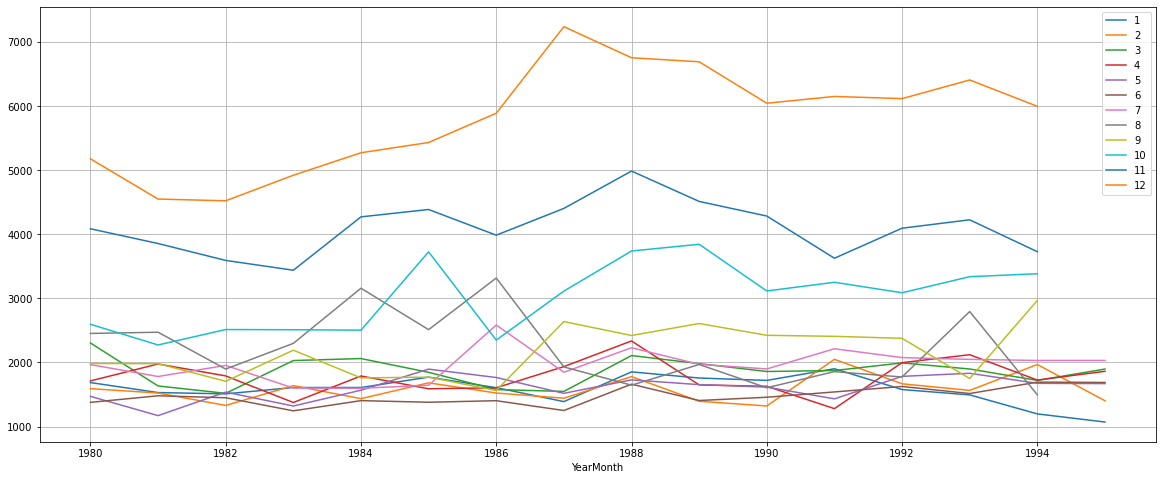

In [24]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

#### Plot the Empirical Cumulative Distribution.

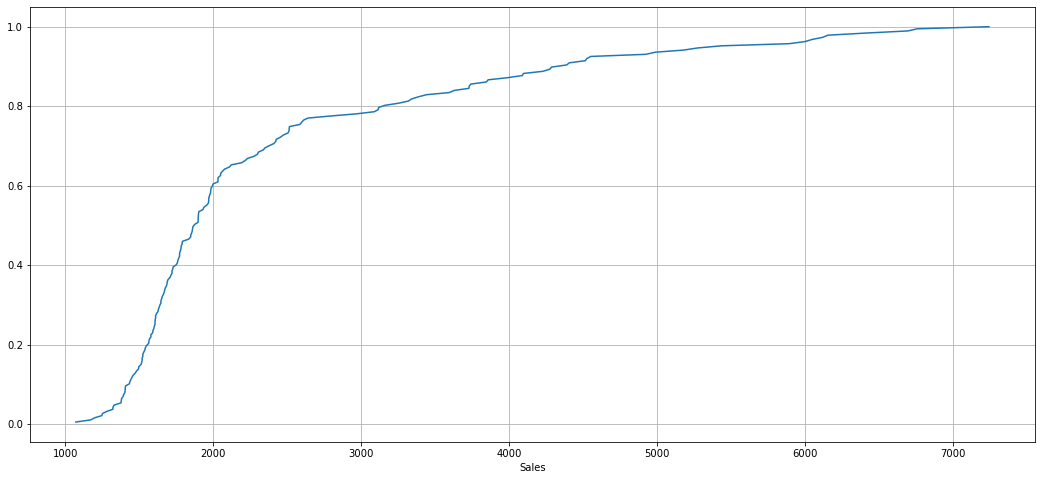

In [25]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales');

This particular graph tells us what percentage of data points refer to what number of Sales.

#### Plot the average RetailSales per month and the month on month percentage change of RetailSales.

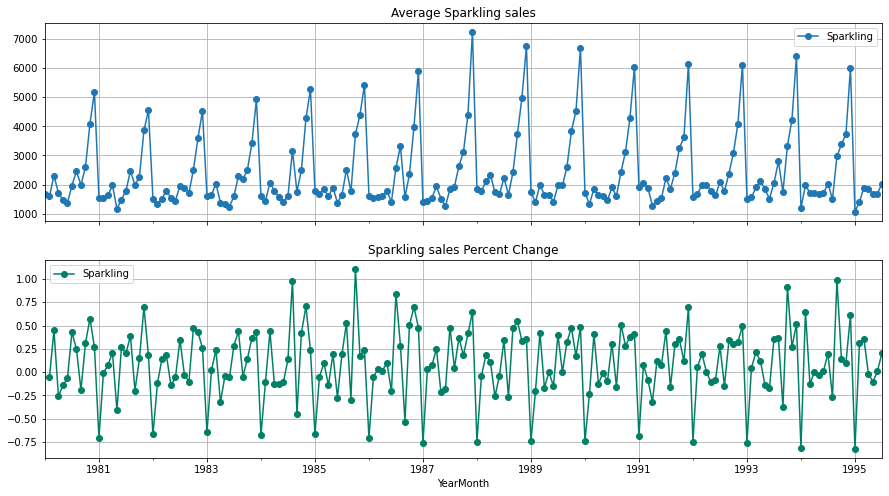

In [26]:
# group by date and get average RetailSales, and precent change
average    = df.groupby(df.index)["Sparkling"].mean()
pct_change = df.groupby(df.index)["Sparkling"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sparkling sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())

# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Sparkling sales Percent Change",grid=True)

The above two graphs tells us the Average sales of Sparkling wine and the Percentage change of Sales with respect to the time.

#### Decompose the Time Series and plot the different components.

In [27]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

#### Additive Decomposition

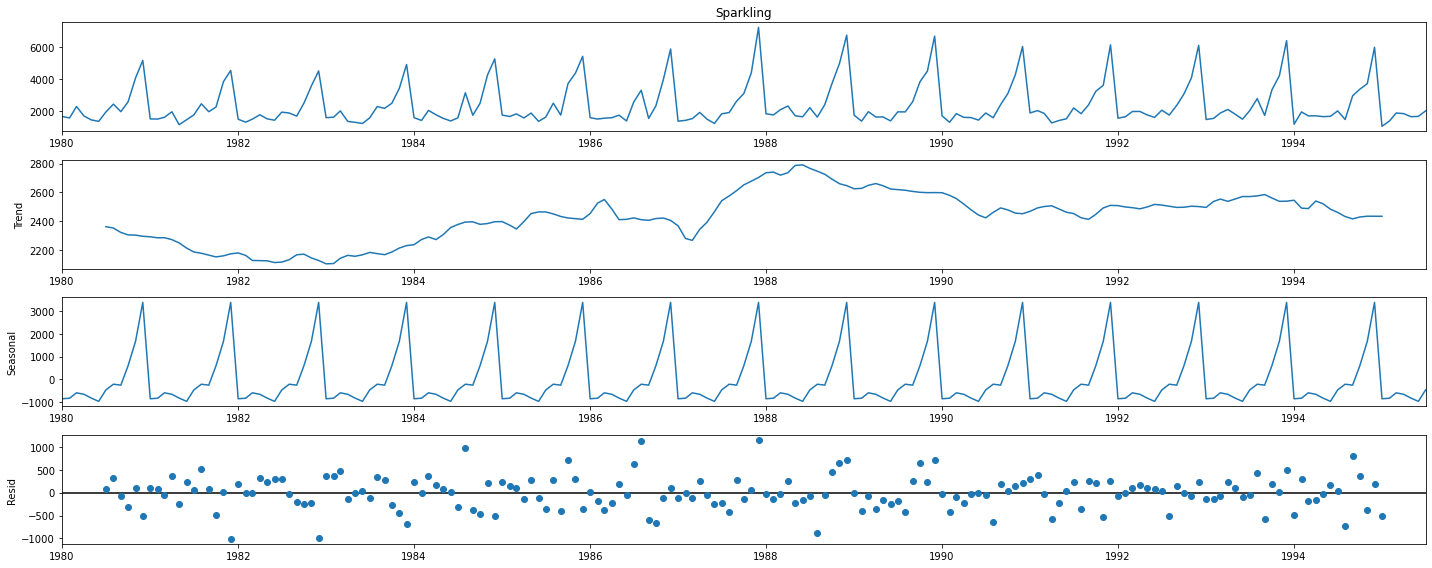

In [28]:
decomposition = seasonal_decompose(df['Sparkling'],model='additive')
decomposition.plot();

We see that the residuals are located around 0 from the plot of the residuals in the decomposition.

In [29]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(8),'\n')
print('Seasonality','\n',seasonality.head(8),'\n')
print('Residual','\n',residual.head(8),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01   -854.260599
1980-02-01   -830.350678
1980-03-01   -592.356630
1980-04-01   -658.490559
1980-05-01   -824.416154
1980-06-01   -967.434011
1980-07-01   -465.502265
1980-08-01   -214.332821
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01     70.835599
1980-08-01    315.999487
Name: resid, dtype: float64 



In [30]:
#Let us check with the additive model formula

2360.666667 - 465.502265 + 70.835599

1966.0000009999999

#### Multiplicative Decomposition

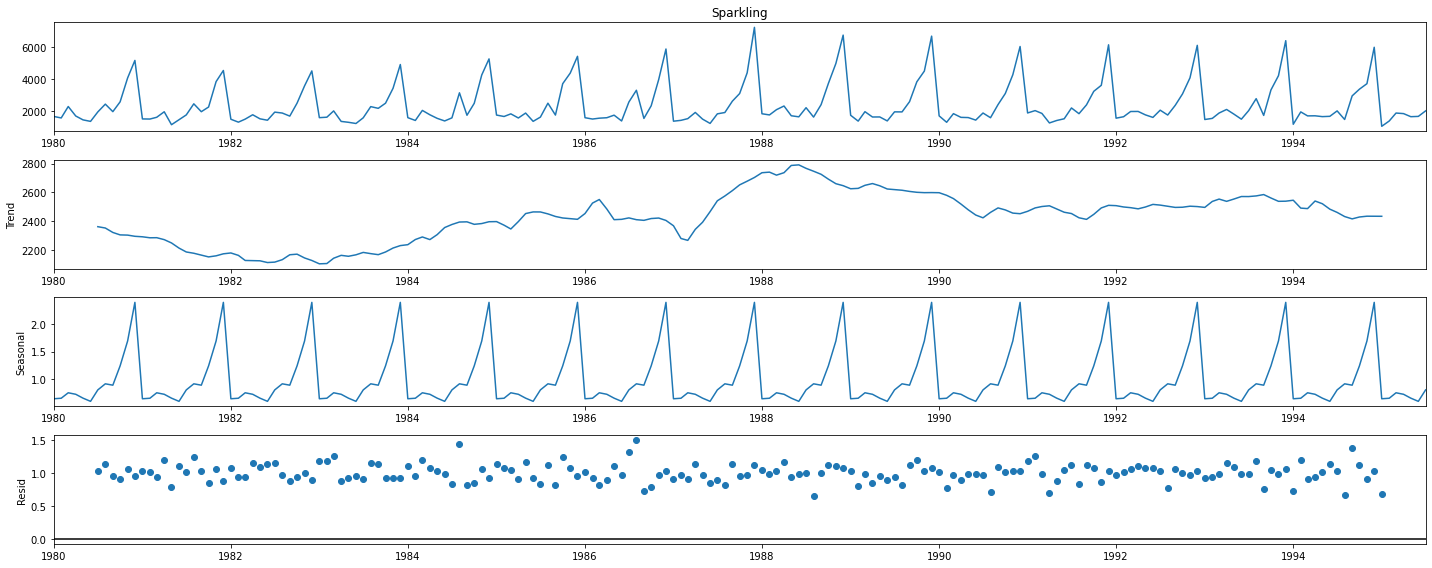

In [31]:
decomposition = seasonal_decompose(df['Sparkling'],model='multiplicative')
decomposition.plot();

For the multiplicative series, we see that a lot of residuals are located around 1.

Since both the trend and seasonality are the same from the above plots of decomposition, we can infer that the time series model is additive.

In [32]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(8),'\n')
print('Seasonality','\n',seasonality.head(8),'\n')
print('Residual','\n',residual.head(8),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.649843
1980-02-01    0.659214
1980-03-01    0.757440
1980-04-01    0.730351
1980-05-01    0.660609
1980-06-01    0.603468
1980-07-01    0.809164
1980-08-01    0.918822
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    1.029230
1980-08-01    1.135407
Name: resid, dtype: float64 



In [33]:
# Let us check with the muliplicative model formula

2360.666667 * 0.809164 * 1.029230

1966.0006492326186

We can observe that both the values are same. Hence, it is a additive model.

### 3. Split the data into training and test. The test data should start in 1991.

In [34]:
train=df[df.index.year < 1991]
test=df[df.index.year >= 1991]

In [35]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [36]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


Last few rows of Training Data


,Sparkling
YearMonth,
1990-08-01,1605
1990-09-01,2424
1990-10-01,3116
1990-11-01,4286
1990-12-01,6047


First few rows of Test Data


,Sparkling
YearMonth,
1991-01-01,1902
1991-02-01,2049
1991-03-01,1874
1991-04-01,1279
1991-05-01,1432


Last few rows of Test Data


,Sparkling
YearMonth,
1995-03-01,1897
1995-04-01,1862
1995-05-01,1670
1995-06-01,1688
1995-07-01,2031


In [37]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


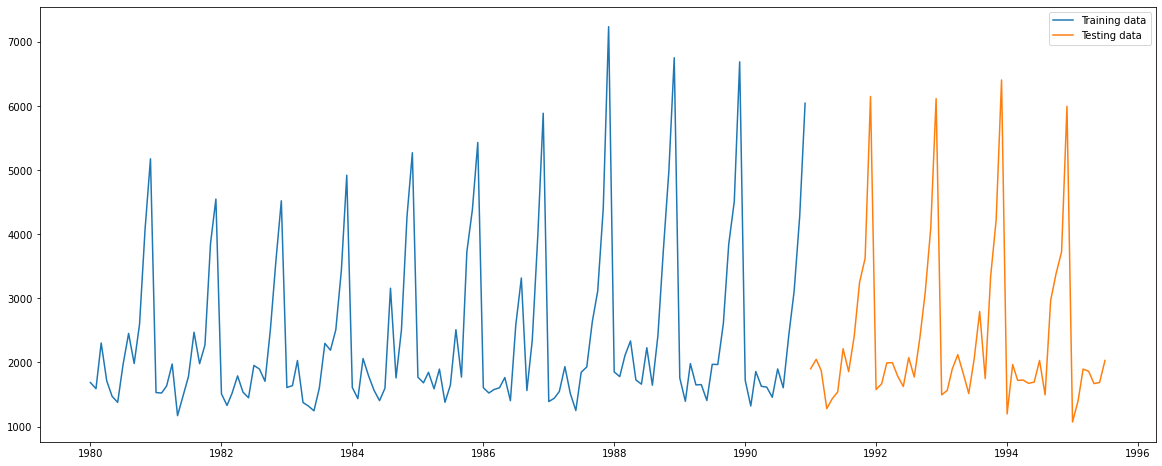

In [38]:
plt.plot(train, label = 'Training data')
plt.plot(test, label = 'Testing data')
plt.plot()
plt.legend();

### 4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other additional models such as regression, naïve forecast models, simple average models, moving average models should also be built on the training data and check the performance on the test data using RMSE.

#### Model 1: Linear Regression

For this particular linear regression, we are going to regress the 'Rose' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

In [39]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+43 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97]


We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [40]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [41]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
YearMonth                  
1980-01-01       1686     1
1980-02-01       1591     2
1980-03-01       2304     3
1980-04-01       1712     4
1980-05-01       1471     5 

Last few rows of Training Data 
             Sparkling  time
YearMonth                  
1990-08-01       1605   128
1990-09-01       2424   129
1990-10-01       3116   130
1990-11-01       4286   131
1990-12-01       6047   132 

First few rows of Test Data 
             Sparkling  time
YearMonth                  
1991-01-01       1902    43
1991-02-01       2049    44
1991-03-01       1874    45
1991-04-01       1279    46
1991-05-01       1432    47 

Last few rows of Test Data 
             Sparkling  time
YearMonth                  
1995-03-01       1897    93
1995-04-01       1862    94
1995-05-01       1670    95
1995-06-01       1688    96
1995-07-01       2031    97 



Now that our training and test data has been modified, let us go ahead use 𝐿𝑖𝑛𝑒𝑎𝑟𝑅𝑒𝑔𝑟𝑒𝑠𝑠𝑖𝑜𝑛 to build the model on the training data and test the model on the test data.

In [42]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'])

LinearRegression()

In [43]:
train_predictions_model1 = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1 = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

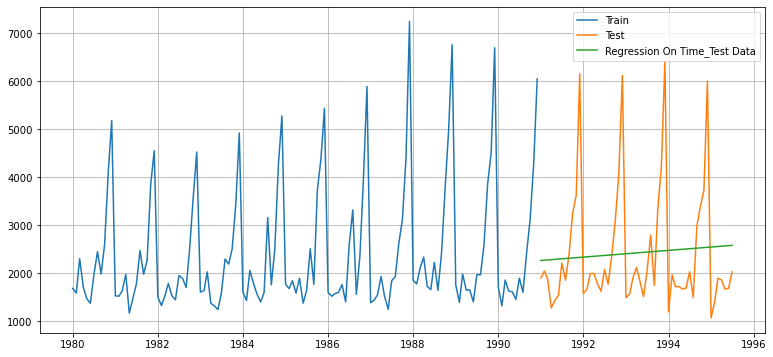

In [44]:
plt.figure(figsize=(13,6))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

#### Model Evaluation

In [45]:
from sklearn import metrics

In [46]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

For RegressionOnTime forecast on the Test Data,  RMSE is 1275.867


,Test RMSE
RegressionOnTime,1275.867052


#### Model 2: Naive Approach: 𝑦̂ 𝑡+1=𝑦𝑡 

For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

In [47]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [48]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    6047
1991-02-01    6047
1991-03-01    6047
1991-04-01    6047
1991-05-01    6047
Name: naive, dtype: int64

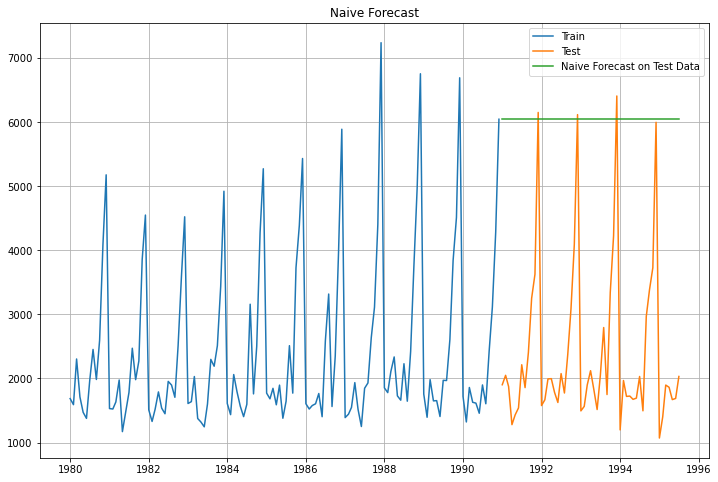

In [49]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

#### Model Evaluation

In [50]:
## Test Data - RMSE
rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

For RegressionOnTime forecast on the Test Data,  RMSE is 3864.279


,Test RMSE
RegressionOnTime,1275.867052
NaiveModel,3864.279352


#### Model 3: Simple Average

For this particular simple average method, we will forecast by using the average of the training values.

In [51]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [52]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

,Sparkling,mean_forecast
YearMonth,,
1991-01-01,1902,2403.780303
1991-02-01,2049,2403.780303
1991-03-01,1874,2403.780303
1991-04-01,1279,2403.780303
1991-05-01,1432,2403.780303


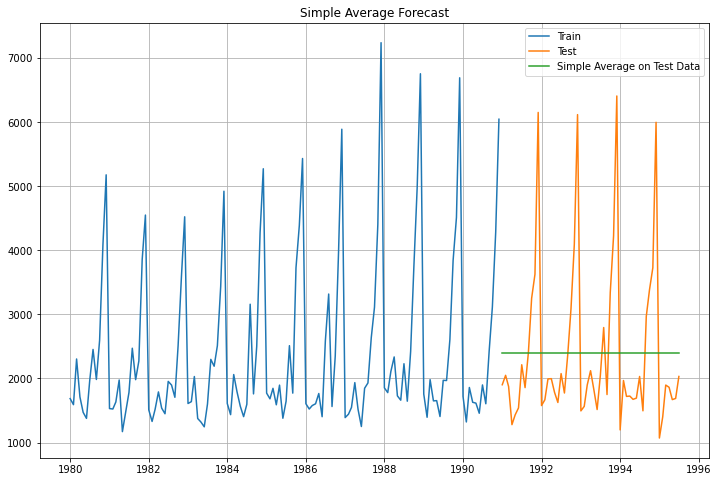

In [53]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

#### Model Evaluation

In [54]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

For Simple Average forecast on the Test Data,  RMSE is 1275.082


,Test RMSE
RegressionOnTime,1275.867052
NaiveModel,3864.279352
SimpleAverageModel,1275.081804


#### Model 4: Moving Average(MA)

For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.

For Moving Average, we are going to average over the entire data.

In [55]:
MovingAverage = df.copy()
MovingAverage.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


#### Trailing moving averages

In [56]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

,Sparkling,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1980-01-01,1686,NaN,NaN,NaN,NaN
1980-02-01,1591,1638.5,NaN,NaN,NaN
1980-03-01,2304,1947.5,NaN,NaN,NaN
1980-04-01,1712,2008.0,1823.25,NaN,NaN
1980-05-01,1471,1591.5,1769.50,NaN,NaN


In [57]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[0:132] 
trailing_MovingAverage_test=MovingAverage[132:]

In [58]:
trailing_MovingAverage_train.shape

(132, 5)

In [59]:
trailing_MovingAverage_test.shape

(55, 5)

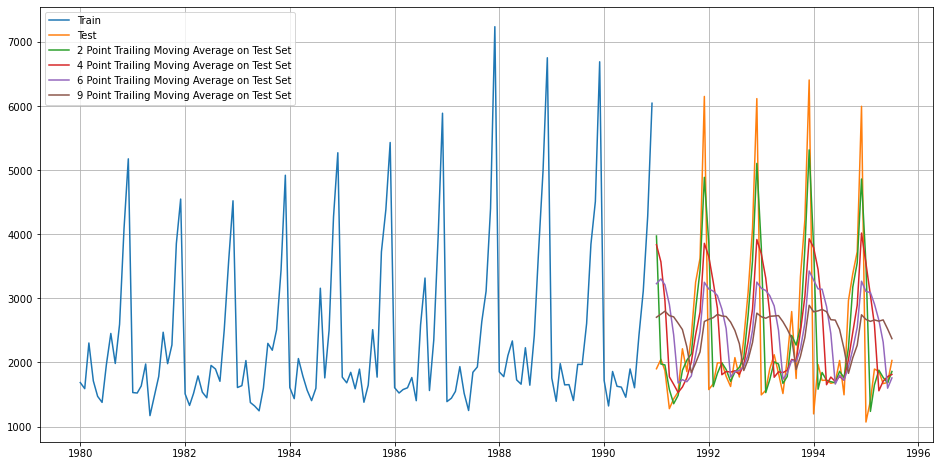

In [60]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

In [61]:
# Model Evaluation

## Test Data - RMSE  --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 813.401
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1346.278


In [62]:
resultsDf4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf4])
resultsDf

,Test RMSE
RegressionOnTime,1275.867052
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315


Before we go on to build the various Exponential Smoothing models, let us plot all the models and compare the Time Series plots.

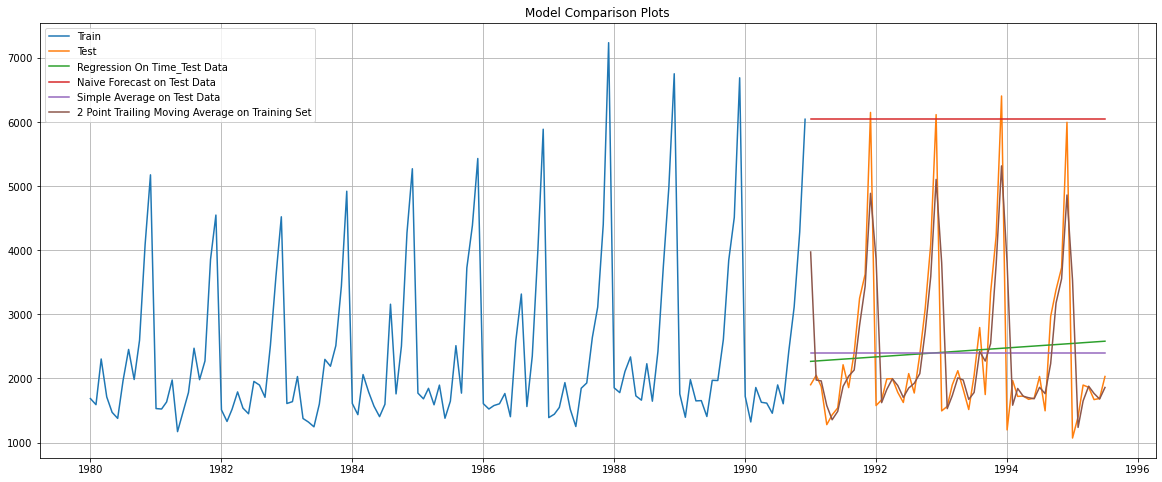

In [63]:
## Plotting on both Training and Test data

plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

#### Model 5: Simple Exponential Smoothing

SimpleExpSmoothing class must be instantiated and passed the training data.

The fit() function is then called providing the fit configuration, the alpha value, smoothing_level. If this is omitted or set to None, the model will automatically optimize the value.

In [64]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [65]:
SES_train = train.copy()
SES_test = test.copy()

In [66]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling'],initialization_method='estimated')

C:\Users\Shylajhaa\greatlearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [67]:
model_SES_autofit = model_SES.fit(optimized=True)

C:\Users\Shylajhaa\greatlearning\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [68]:
model_SES_autofit.params

{'smoothing_level': 0.07028781460389563,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1763.9269926897732,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [69]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

,Sparkling,predict
YearMonth,,
1991-01-01,1902,2804.662714
1991-02-01,2049,2804.662714
1991-03-01,1874,2804.662714
1991-04-01,1279,2804.662714
1991-05-01,1432,2804.662714


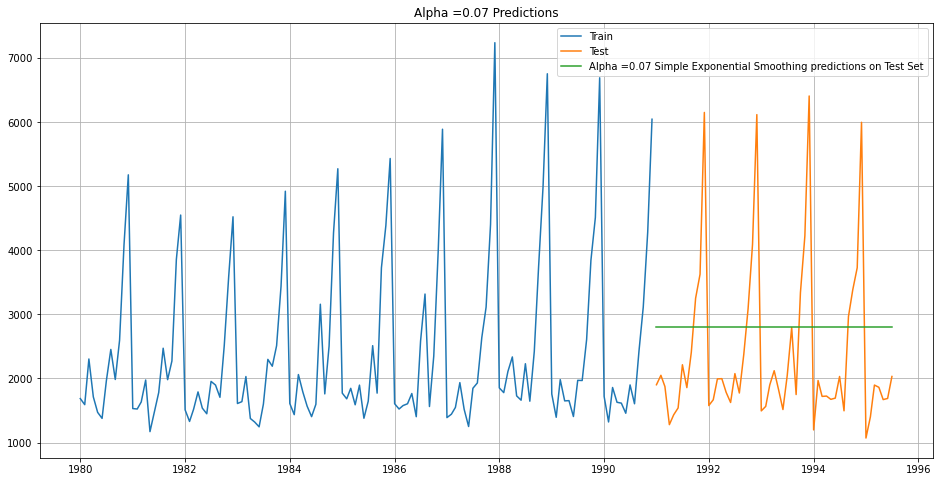

In [70]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.07 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.07 Predictions');

#### Model Evaluation for 𝛼 = 0.07 : Simple Exponential Smoothing

In [71]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict'],squared=False)
print("For Alpha =0.07 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))

For Alpha =0.07 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 1338.005


In [72]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.07,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE
RegressionOnTime,1275.867052
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.07,SimpleExponentialSmoothing",1338.004623


#### Model 6: Double Exponential Smoothing (Holt's Model)

Two parameters 𝛼 and 𝛽 are estimated in this model. Level and Trend are accounted for in this model.

In [73]:
DES_train = train.copy()
DES_test = test.copy()

In [74]:
model_DES = Holt(DES_train['Sparkling'],initialization_method='estimated')

C:\Users\Shylajhaa\greatlearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [75]:
model_DES = model_DES.fit(optimized=True)

C:\Users\Shylajhaa\greatlearning\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [76]:
model_DES.params

{'smoothing_level': 0.6649999999999999,
 'smoothing_trend': 0.0001,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1502.1999999999998,
 'initial_trend': 74.87272727272733,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [77]:
DES_test['predict'] = model_DES.forecast(steps=len(test))
DES_test.head()

,Sparkling,predict
YearMonth,,
1991-01-01,1902,5401.733026
1991-02-01,2049,5476.005230
1991-03-01,1874,5550.277433
1991-04-01,1279,5624.549637
1991-05-01,1432,5698.821840


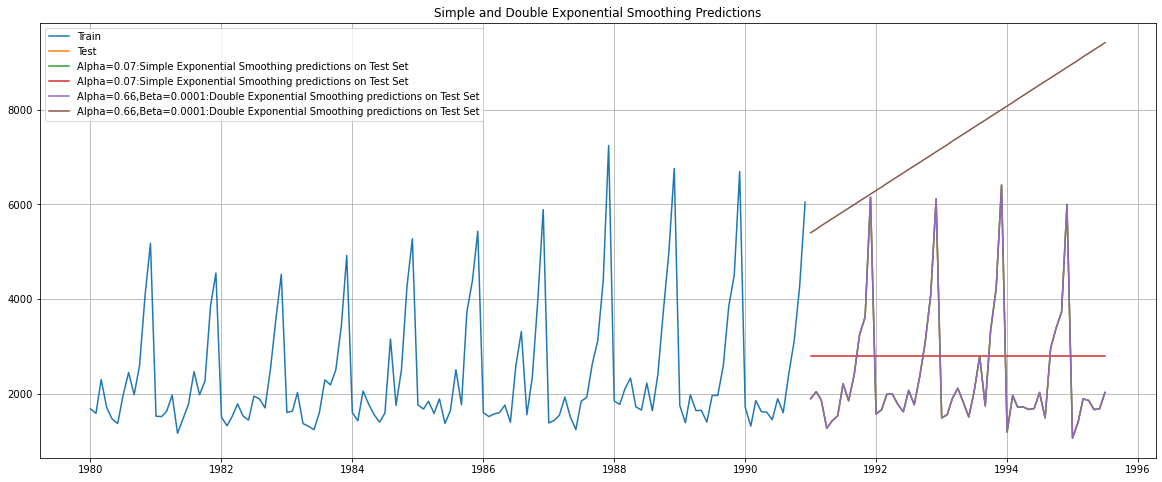

In [78]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_test, label='Alpha=0.07:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_test, label='Alpha=0.66,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

#### Model Evaluation for 𝛼 = 0.66 : Double Exponential Smoothing

In [79]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict'],squared=False)
print("For Alpha =0.66,Beta=0.0001 Double Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model6_test_1))

For Alpha =0.66,Beta=0.0001 Double Exponential Smoothing Model forecast on the Test Data, RMSE is 5291.880


In [80]:
resultsDf_6 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]},index=['Alpha=0.66,Beta=0.0001,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6])
resultsDf

,Test RMSE
RegressionOnTime,1275.867052
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.07,SimpleExponentialSmoothing",1338.004623
"Alpha=0.66,Beta=0.0001,DoubleExponentialSmoothing",5291.879833


#### Model 7: Triple Exponential Smoothing (Holt - Winter's Model) - A, A, A
Three parameters  𝛼 ,  𝛽  and  𝛾  are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [81]:
TES_train = train.copy()
TES_test = test.copy()

In [82]:
# Initializing the Triple Exponential Smoothing Model
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

C:\Users\Shylajhaa\greatlearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [83]:
model_TES.params

{'smoothing_level': 0.11127217859992398,
 'smoothing_trend': 0.01236078328796452,
 'smoothing_seasonal': 0.4607177642170641,
 'damping_trend': nan,
 'initial_level': 2356.578308185137,
 'initial_trend': -0.01853556812789492,
 'initial_seasons': array([-636.23360535, -722.98363367, -398.6436108 , -473.43084469,
        -808.42525514, -815.35024951, -384.23066987,   72.99508063,
        -237.44272911,  272.32584554, 1541.3782103 , 2590.0775386 ]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [84]:
# Forecasting using this model for the duration of the test set
TES_test['predict'] = model_TES.forecast(steps=len(test))
TES_test.head()

,Sparkling,predict
YearMonth,,
1991-01-01,1902,1490.574426
1991-02-01,2049,1204.714325
1991-03-01,1874,1688.941106
1991-04-01,1279,1551.450810
1991-05-01,1432,1461.440427


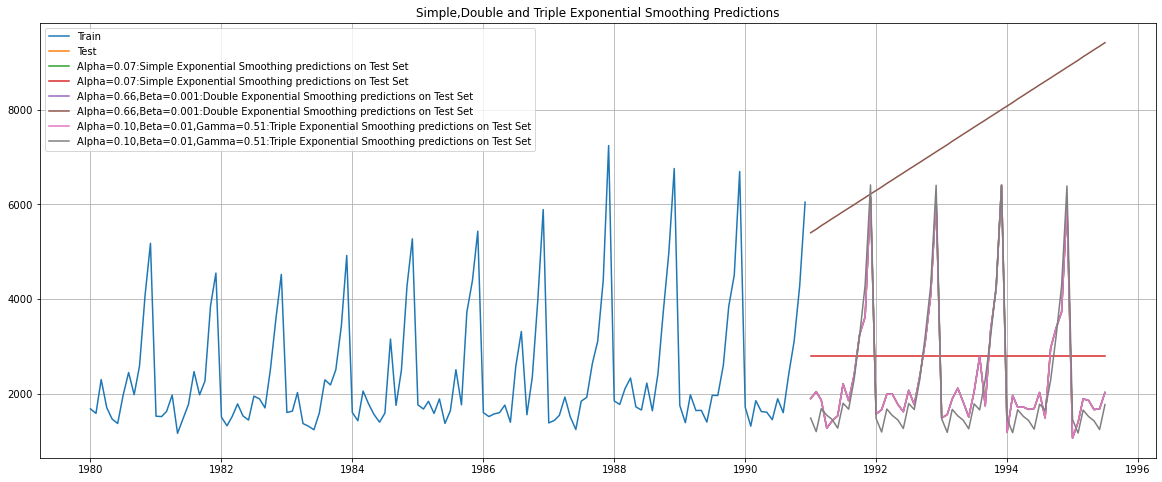

In [85]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_test, label='Alpha=0.07:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_test, label='Alpha=0.66,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_test, label='Alpha=0.10,Beta=0.01,Gamma=0.51:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

#### Model Evaluation for 𝛼 = 0.10, 𝛽 = 0.01 and 𝛾 = 0.51 : Triple Exponential Smoothing (A,A,A)

In [86]:
## Test Data

rmse_model7_test_1 = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict'],squared=False)
print("For Alpha =0.10, Beta=0.01, Gamma=0.51 Triple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model7_test_1))

For Alpha =0.10, Beta=0.01, Gamma=0.51 Triple Exponential Smoothing Model forecast on the Test Data, RMSE is 378.626


In [87]:
resultsDf_7 = pd.DataFrame({'Test RMSE': [rmse_model7_test_1]},index=['Alpha =0.10, Beta=0.01, Gamma=0.51, Triple ExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7])
resultsDf

,Test RMSE
RegressionOnTime,1275.867052
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.07,SimpleExponentialSmoothing",1338.004623
"Alpha=0.66,Beta=0.0001,DoubleExponentialSmoothing",5291.879833
"Alpha =0.10, Beta=0.01, Gamma=0.51, Triple ExponentialSmoothing",378.626241


#### Model 8 : Holt-Winters - ETS(A, A, M) - Holt Winter's linear method

In [88]:
TES_train_am = train.copy()
TES_test_am = test.copy()

In [89]:
# Initializing the Triple Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(train,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

C:\Users\Shylajhaa\greatlearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [90]:
model_TES_am.params

{'smoothing_level': 0.11119949831569428,
 'smoothing_trend': 0.049430920023313805,
 'smoothing_seasonal': 0.3620525701498937,
 'damping_trend': nan,
 'initial_level': 2356.5264391986907,
 'initial_trend': -9.443690175376352,
 'initial_seasons': array([0.71325627, 0.68332509, 0.90537798, 0.80561841, 0.65639659,
        0.65451508, 0.88690241, 1.13423953, 0.91927727, 1.21396745,
        1.86941738, 2.3734461 ]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [91]:
# Forecasting using this model for the duration of the test set
TES_test_am['predict'] = model_TES_am.forecast(steps=len(test))
TES_test_am.head()

,Sparkling,predict
YearMonth,,
1991-01-01,1902,1587.685845
1991-02-01,2049,1356.590237
1991-03-01,1874,1763.121866
1991-04-01,1279,1656.379813
1991-05-01,1432,1542.186697


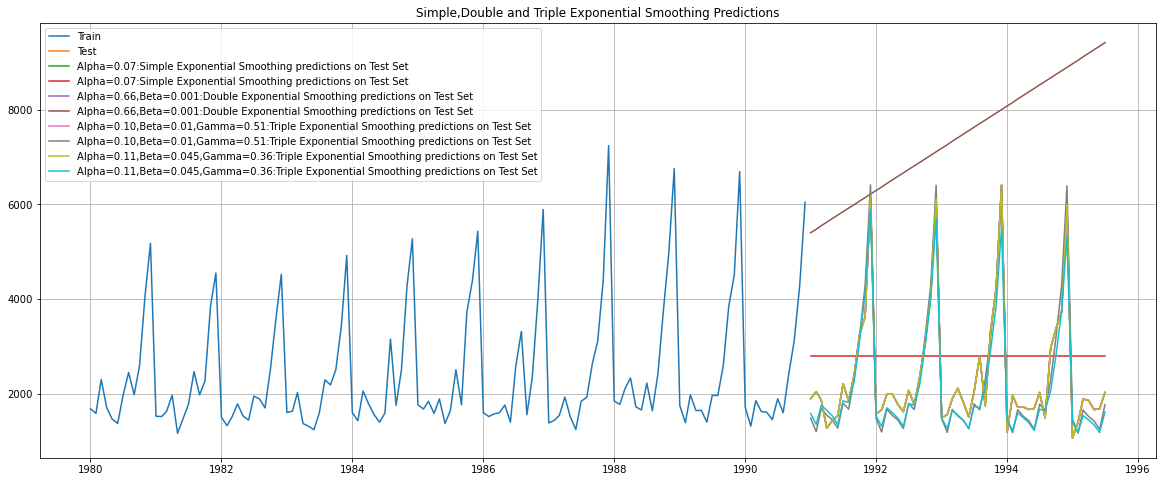

In [92]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_test, label='Alpha=0.07:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_test, label='Alpha=0.66,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_test, label='Alpha=0.10,Beta=0.01,Gamma=0.51:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_test_am, label='Alpha=0.11,Beta=0.045,Gamma=0.36:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

#### Model Evaluation for 𝛼 = 0.11, 𝛽 = 0.045 and 𝛾 = 0.36 : Triple Exponential Smoothing (A,A,M)

In [93]:
## Test Data

rmse_model8_test_1 = metrics.mean_squared_error(TES_test_am['Sparkling'],TES_test_am['predict'],squared=False)
print("For Alpha=0.11,Beta=0.045,Gamma=0.36 Triple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model8_test_1))

For Alpha=0.11,Beta=0.045,Gamma=0.36 Triple Exponential Smoothing Model forecast on the Test Data, RMSE is 403.706


In [94]:
resultsDf_8 = pd.DataFrame({'Test RMSE': [rmse_model8_test_1]},index=['For Alpha=0.11,Beta=0.045,Gamma=0.36, Triple ExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8])
resultsDf

,Test RMSE
RegressionOnTime,1275.867052
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.07,SimpleExponentialSmoothing",1338.004623
"Alpha=0.66,Beta=0.0001,DoubleExponentialSmoothing",5291.879833
"Alpha =0.10, Beta=0.01, Gamma=0.51, Triple ExponentialSmoothing",378.626241


We see that the multiplicative seasonality model has not done that well when compared to the additive seasonality Triple Exponential Smoothing model.

### 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

The hypothesis in a simple form for the ADF test is:

H0 : The Time Series has a unit root and is thus non-stationary.

H1 : The Time Series does not have a unit root and is thus stationary.

In [95]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

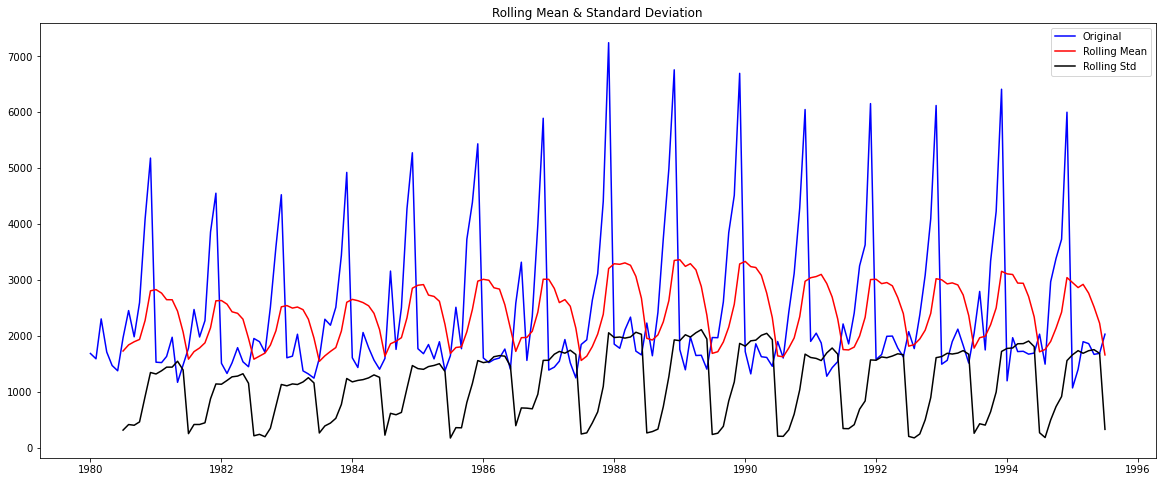

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [96]:
test_stationarity(df['Sparkling'])

We see that at 5% significant level the Time Series is non-stationary.

Let us take a difference of order 1 and check whether the Time Series is stationary or not.

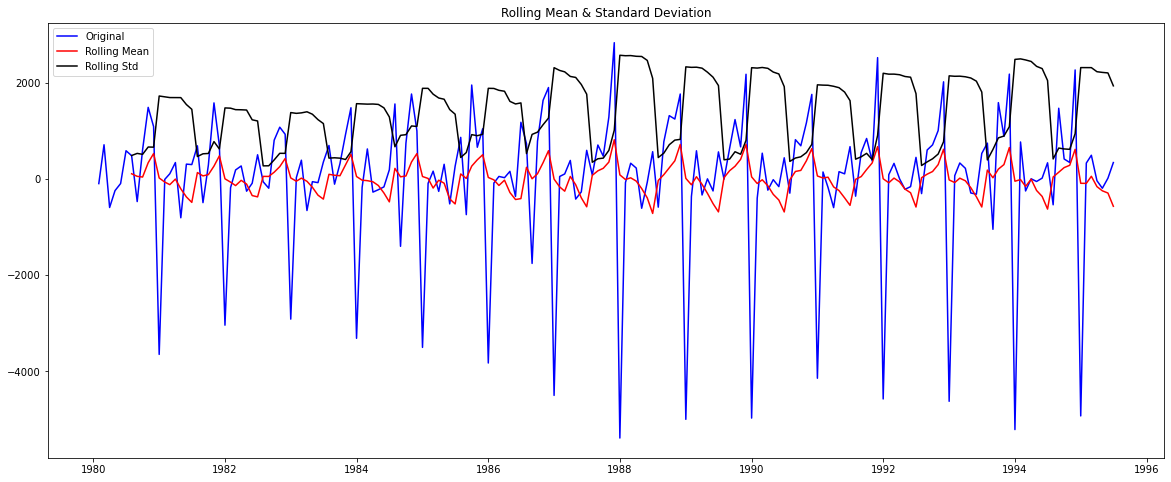

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [97]:
test_stationarity(df['Sparkling'].diff().dropna())

We see that at  𝛼  = 0.05 the Time Series is indeed stationary.

### 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

The data has some seasonality so ideally we should build a SARIMA model. But for demonstration purposes we are building an ARIMA model both by looking at the minimum AIC criterion and by looking at the ACF and the PACF plots.

#### ARIMA Model

In [98]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [99]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [100]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()#fitting the ARIMA model
    
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    #printing the parameters and the AIC
    
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.060015591336
ARIMA(0, 1, 2) - AIC:2234.4083231280847
ARIMA(1, 1, 0) - AIC:2266.6085393190087
ARIMA(1, 1, 1) - AIC:2235.7550946815218
ARIMA(1, 1, 2) - AIC:2234.5272004521566
ARIMA(2, 1, 0) - AIC:2260.36574396809
ARIMA(2, 1, 1) - AIC:2233.77762634562
ARIMA(2, 1, 2) - AIC:2213.509212685558


In [101]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
8,"(2, 1, 2)",2213.509213
7,"(2, 1, 1)",2233.777626
2,"(0, 1, 2)",2234.408323
5,"(1, 1, 2)",2234.527200
4,"(1, 1, 1)",2235.755095
6,"(2, 1, 0)",2260.365744
1,"(0, 1, 1)",2263.060016
3,"(1, 1, 0)",2266.608539
0,"(0, 1, 0)",2267.663036


In [102]:
auto_ARIMA = ARIMA(train, order=(2,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\Shylajhaa\greatlearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Shylajhaa\greatlearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Shylajhaa\greatlearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Thu, 03 Mar 2022   AIC                           2213.509
Time:                        21:08:56   BIC                           2227.885
Sample:                    01-01-1980   HQIC                          2219.351
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.781      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.740      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.217      0.0

#### Predict on the Test Set using this model and evaluate the model.

In [103]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [160]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA,squared=False)
print(rmse)

1299.980240900083


In [105]:
resultsDf_9 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA(2,1,2)'])

resultsDf = pd.concat([resultsDf, resultsDf_9])
resultsDf

,Test RMSE
RegressionOnTime,1275.867052
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.07,SimpleExponentialSmoothing",1338.004623
"Alpha=0.66,Beta=0.0001,DoubleExponentialSmoothing",5291.879833
"Alpha =0.10, Beta=0.01, Gamma=0.51, Triple ExponentialSmoothing",378.626241


#### SARIMA Model

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

In [106]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

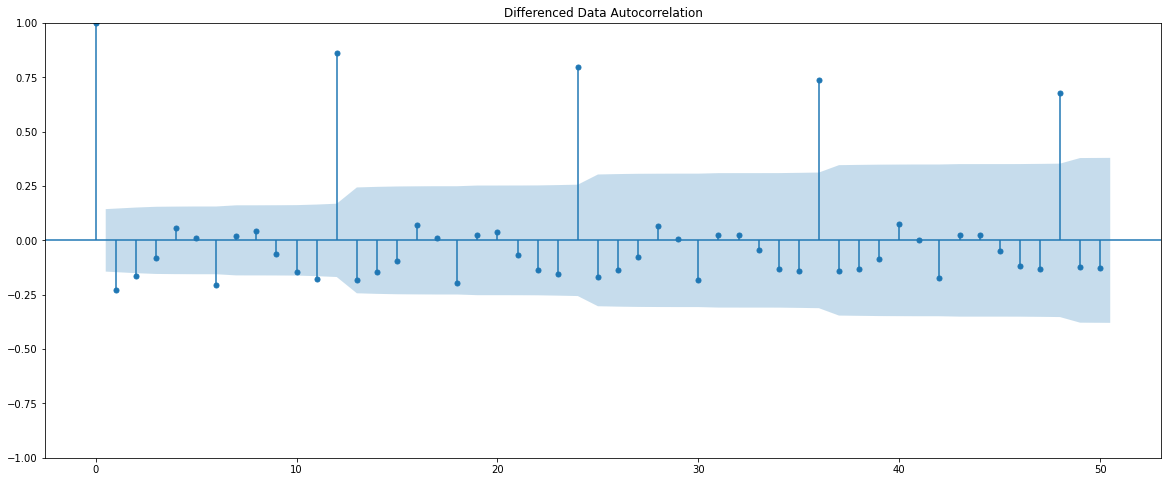

In [107]:
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

We see that there can be a seasonality of 6 as well as 12. We will run our auto SARIMA models by setting seasonality both as 6 and 12.

#### Setting the seasonality as 6 for the first iteration of the auto SARIMA model.¶

In [108]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [109]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [110]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:2152.3780761716293
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1955.6355536891406
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:2164.4097581959904
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:2079.5599844431877
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1926.9360123982528
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1839.4012986872267


C:\Users\Shylajhaa\greatlearning\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1841.1993617510389
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1810.9177805656027
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:2230.162907850584
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:2130.56528590828
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1918.18763395425
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:2139.5732428785805
SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:2006.517429813666
SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1855.7093274210556
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:1798.7885104014895
SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1800.7717933367655
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1741.7036710327836
SARIMA(0, 1, 2)x(0, 0, 0, 6) - AIC:2187.441010168731
SARIMA(0, 1, 2)x(0, 0, 1, 6) - AIC:2087.6843840215606
SARIMA(0, 1, 2)x(0, 0, 2, 6) - AIC:1886.1151457033793
SARIMA(0, 1, 2)x(1, 0, 0, 6) - AIC:2129.739568923493
SARIMA(0, 1, 2)x(1, 0, 1, 6) - AIC:1988.4215604844655
SARIMA(0, 1, 2)x(1, 0, 2, 6) - AIC:1839.6963213103866
SARIMA(0, 1, 2)x(2, 0, 0, 6) - AIC:1791.6537079050074
SARIMA(0, 1, 2)x(2, 0, 1, 6) - AIC:1

In [111]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
53,"(1, 1, 2)","(2, 0, 2, 6)",1727.497105
26,"(0, 1, 2)","(2, 0, 2, 6)",1727.888805
80,"(2, 1, 2)","(2, 0, 2, 6)",1729.335490
17,"(0, 1, 1)","(2, 0, 2, 6)",1741.703671
44,"(1, 1, 1)","(2, 0, 2, 6)",1743.379781


In [112]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -855.749
Date:                           Thu, 03 Mar 2022   AIC                           1727.497
Time:                                   21:10:04   BIC                           1749.526
Sample:                                        0   HQIC                          1736.440
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6461      0.287     -2.250      0.024      -1.209      -0.083
ma.L1         -0.3350      0.228     -1.469

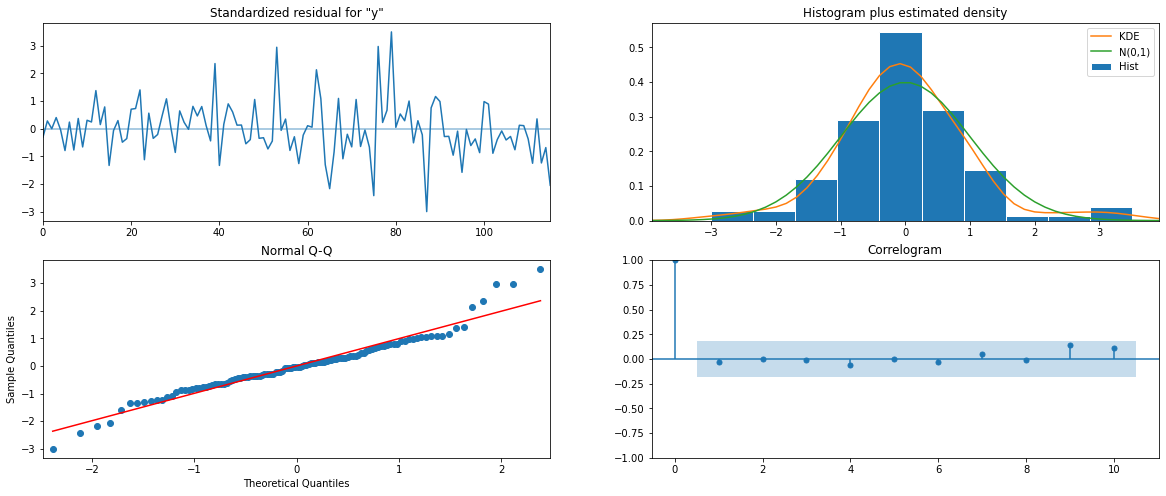

In [113]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

From the model diagnostics plot, we can see that all the individual diagnostics plots almost follow the theoretical numbers and thus we cannot develop any pattern from these plots.

#### Predict on the Test Set using this model and evaluate the model.

In [114]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

In [115]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,1329.872146,380.492553,584.120445,2075.623847
1,1177.291332,392.029108,408.928400,1945.654264
2,1624.459229,392.226075,855.710248,2393.208210
3,1544.381931,397.640600,765.020677,2323.743186
4,1306.106890,398.861907,524.351918,2087.861863


In [116]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

629.3379493070956


In [117]:
resultsDf_10 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(1,1,2)(2,0,2,6)'])


resultsDf = pd.concat([resultsDf, resultsDf_10])

resultsDf

,Test RMSE
RegressionOnTime,1275.867052
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.07,SimpleExponentialSmoothing",1338.004623
"Alpha=0.66,Beta=0.0001,DoubleExponentialSmoothing",5291.879833
"Alpha =0.10, Beta=0.01, Gamma=0.51, Triple ExponentialSmoothing",378.626241


#### Setting the seasonality as 12 for the second iteration of the auto SARIMA model.

In [118]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [119]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [120]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.2614616843723
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.1533640233733
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.4366022456675
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.990530139005
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.210873579213
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470858
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.2054158608069
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.989805392079
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.162907850584
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.7688649566585
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.7089572770483
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.179588183819
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.0903193756562
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.1509144551503
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.6751954178403
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.2245084361584
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.3683740079664
SARIMA(0, 1, 2)

In [121]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
50,"(1, 1, 2)","(1, 0, 2, 12)",1555.584247
53,"(1, 1, 2)","(2, 0, 2, 12)",1556.076774
26,"(0, 1, 2)","(2, 0, 2, 12)",1557.121566
23,"(0, 1, 2)","(1, 0, 2, 12)",1557.160507
77,"(2, 1, 2)","(1, 0, 2, 12)",1557.340402


In [122]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -770.792
Date:                            Thu, 03 Mar 2022   AIC                           1555.584
Time:                                    21:11:39   BIC                           1574.095
Sample:                                         0   HQIC                          1563.083
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6282      0.255     -2.464      0.014      -1.128      -0.128
ma.L1         -0.1040      0.225   

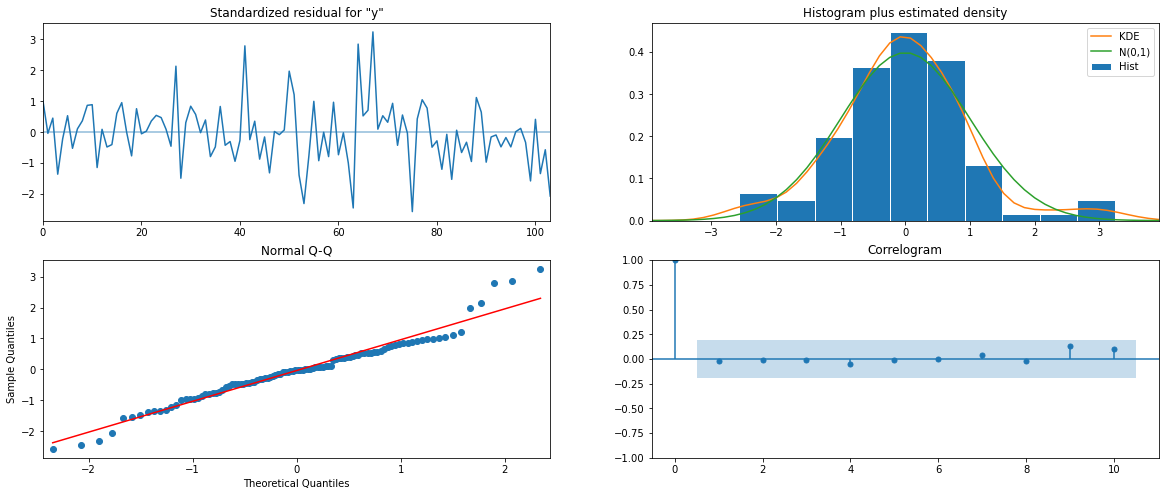

In [123]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

Similar to the last iteration of the model where the seasonality parameter was taken as 6, here also we see that the model diagnostics plot does not indicate any remaining information that we can get.

#### Predict on the Test Set using this model and evaluate the model.

In [124]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [125]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,1327.331313,388.343141,566.192743,2088.469884
1,1315.065377,402.008489,527.143216,2102.987537
2,1621.526590,402.002103,833.616947,2409.436234
3,1598.819472,407.241674,800.640458,2396.998486
4,1392.633100,407.972143,593.022393,2192.243806


In [126]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

528.6619815533354


In [127]:
resultsDf_10 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(1,1,2)(1,0,2,12)'])


resultsDf = pd.concat([resultsDf, resultsDf_10])

resultsDf

,Test RMSE
RegressionOnTime,1275.867052
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.07,SimpleExponentialSmoothing",1338.004623
"Alpha=0.66,Beta=0.0001,DoubleExponentialSmoothing",5291.879833
"Alpha =0.10, Beta=0.01, Gamma=0.51, Triple ExponentialSmoothing",378.626241


We see that the RMSE value has reduced further when the seasonality parameter was changed to 12.

### 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

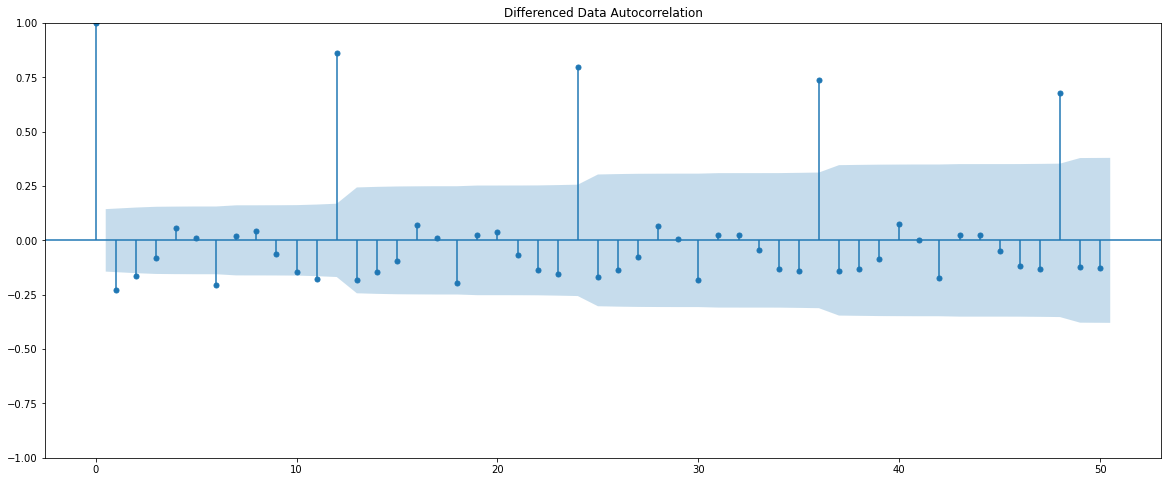

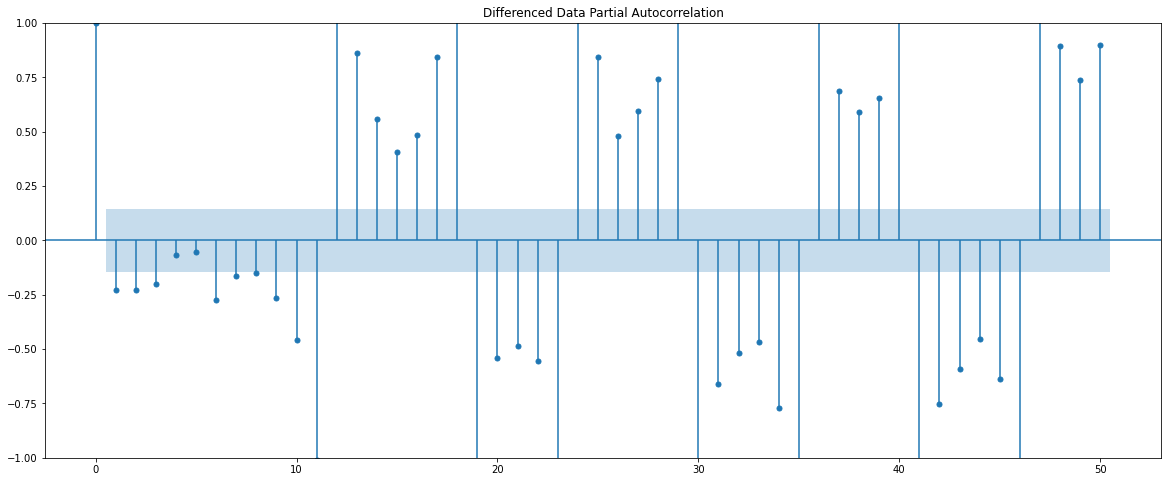

In [128]:
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

Here, we have taken alpha=0.05.

* The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 0.
* The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 0.

By looking at the above plots, we can say that both the PACF and ACF plot cuts-off at lag 0.

#### Manual ARIMA

In [129]:
manual_ARIMA = ARIMA(train['Sparkling'].astype('float64'), order=(1,1,0))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1131.304
Date:                Thu, 03 Mar 2022   AIC                           2266.609
Time:                        21:11:42   BIC                           2272.359
Sample:                    01-01-1980   HQIC                          2268.945
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1522      0.105     -1.448      0.148      -0.358       0.054
sigma2       1.87e+06   2.15e+05      8.698      0.000    1.45e+06    2.29e+06
Ljung-Box (L1) (Q):                   0.20   Jarque-

C:\Users\Shylajhaa\greatlearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Shylajhaa\greatlearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Shylajhaa\greatlearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


#### Predict on the Test Set using this model and evaluate the model.

In [130]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [132]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_ARIMA,squared=False)
print(rmse)

3644.925661610567


In [133]:
resultsDf_11 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['Manual ARIMA(1,1,0)'])


resultsDf = pd.concat([resultsDf, resultsDf_11])
resultsDf

,Test RMSE
RegressionOnTime,1275.867052
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.07,SimpleExponentialSmoothing",1338.004623
"Alpha=0.66,Beta=0.0001,DoubleExponentialSmoothing",5291.879833
"Alpha =0.10, Beta=0.01, Gamma=0.51, Triple ExponentialSmoothing",378.626241


#### Manual SARIMA - Seasonality 6

In [134]:
import statsmodels.api as sm

manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                order=(0,1,0),
                                seasonal_order=(0, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

C:\Users\Shylajhaa\greatlearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Shylajhaa\greatlearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                         SARIMAX Results                                         
Dep. Variable:                                 Sparkling   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(0, 0, [1, 2, 3], 6)   Log Likelihood                -927.892
Date:                                   Thu, 03 Mar 2022   AIC                           1863.785
Time:                                           21:46:29   BIC                           1874.659
Sample:                                       01-01-1980   HQIC                          1868.196
                                            - 12-01-1990                                         
Covariance Type:                                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L6       -0.1811      0.199     -0.909      0.364    

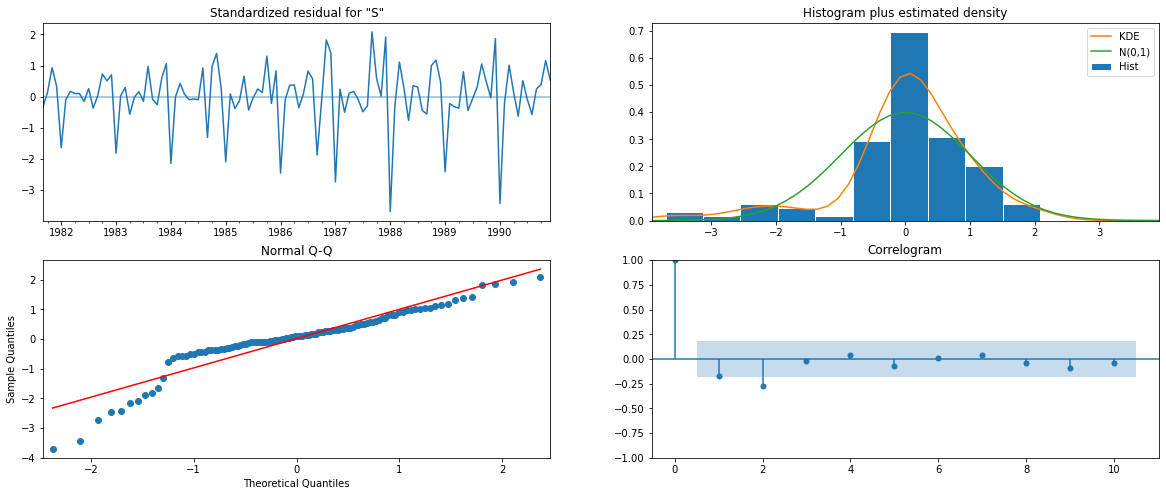

In [135]:
results_manual_SARIMA_6.plot_diagnostics()
plt.show()

#### Predict on the Test Set using this model and evaluate the model.

In [136]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test))

In [137]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

Sparkling,mean,mean_se,mean_ci_lower,mean_ci_upper
1991-01-01,3583.429711,941.821345,1737.493794,5429.365628
1991-02-01,3538.641499,1331.720199,928.517871,6148.765127
1991-03-01,4226.149186,1630.929162,1029.586767,7422.711604
1991-04-01,4251.702714,1883.183786,560.730316,7942.675111
1991-05-01,3595.681368,2105.429271,-530.884175,7722.246912


In [138]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse)

2759.0002398990177


In [139]:
resultsDf_12 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['Manual SARIMA(0,1,0)(0,0,3,6)'])


resultsDf = pd.concat([resultsDf, resultsDf_12])

resultsDf

,Test RMSE
RegressionOnTime,1275.867052
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.07,SimpleExponentialSmoothing",1338.004623
"Alpha=0.66,Beta=0.0001,DoubleExponentialSmoothing",5291.879833
"Alpha =0.10, Beta=0.01, Gamma=0.51, Triple ExponentialSmoothing",378.626241


#### Manual SARIMA - Seasonality 12

In [140]:
manual_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                order=(0,1,0),
                                seasonal_order=(0, 0, 3, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_12 = manual_SARIMA_12.fit(maxiter=1000)
print(results_manual_SARIMA_12.summary())

C:\Users\Shylajhaa\greatlearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Shylajhaa\greatlearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                         SARIMAX Results                                          
Dep. Variable:                                  Sparkling   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(0, 0, [1, 2, 3], 12)   Log Likelihood               -1981.449
Date:                                    Thu, 03 Mar 2022   AIC                           3970.898
Time:                                            21:46:49   BIC                           3981.071
Sample:                                        01-01-1980   HQIC                          3975.007
                                             - 12-01-1990                                         
Covariance Type:                                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12   -1.344e+14         -0        inf      0

C:\Users\Shylajhaa\greatlearning\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


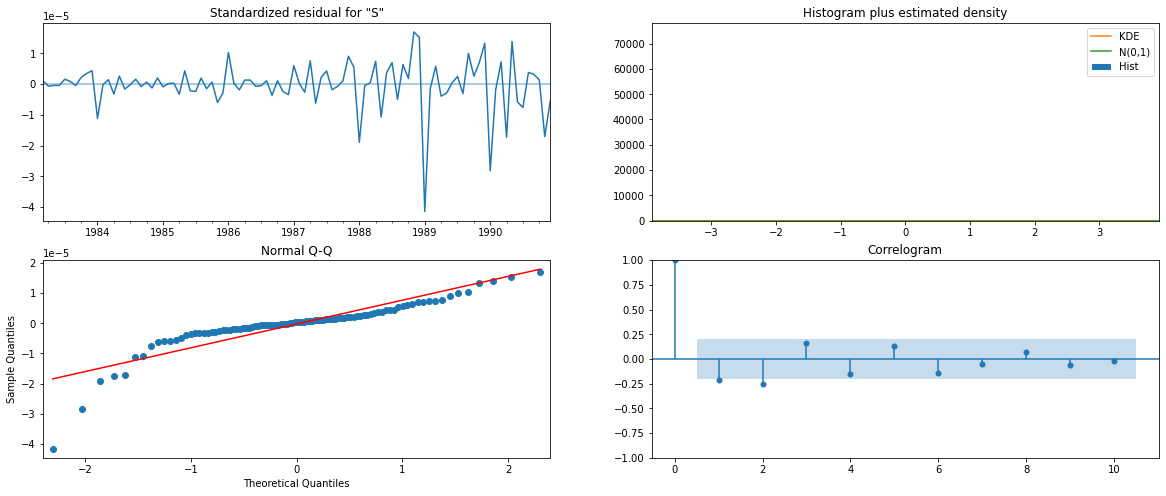

In [141]:
results_manual_SARIMA_12.plot_diagnostics()
plt.show()

#### Predict on the Test Set using this model and evaluate the model.

In [142]:
predicted_manual_SARIMA_12 = results_manual_SARIMA_12.get_forecast(steps=len(test))

In [143]:
predicted_manual_SARIMA_12.summary_frame(alpha=0.05).head()

Sparkling,mean,mean_se,mean_ci_lower,mean_ci_upper
1991-01-01,-12884.706831,5.695211e+08,-1.116254e+09,1.116228e+09
1991-02-01,-13013.132800,8.054244e+08,-1.578616e+09,1.578590e+09
1991-03-01,-12656.589925,9.864395e+08,-1.933398e+09,1.933373e+09
1991-04-01,-4356.639802,1.139042e+09,-2.232486e+09,2.232477e+09
1991-05-01,-16628.269561,1.273488e+09,-2.496007e+09,2.495974e+09


In [144]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA_12.predicted_mean,squared=False)
print(rmse)

16435.007009668196


In [145]:
resultsDf_13 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['Manual SARIMA(0,1,0)(0,0,3,12)'])


resultsDf1 = pd.concat([resultsDf, resultsDf_13])

resultsDf1

,Test RMSE
RegressionOnTime,1275.867052
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.07,SimpleExponentialSmoothing",1338.004623
"Alpha=0.66,Beta=0.0001,DoubleExponentialSmoothing",5291.879833
"Alpha =0.10, Beta=0.01, Gamma=0.51, Triple ExponentialSmoothing",378.626241


### 8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [146]:
resultsDf1

,Test RMSE
RegressionOnTime,1275.867052
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.07,SimpleExponentialSmoothing",1338.004623
"Alpha=0.66,Beta=0.0001,DoubleExponentialSmoothing",5291.879833
"Alpha =0.10, Beta=0.01, Gamma=0.51, Triple ExponentialSmoothing",378.626241


### 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

Now, we will take our best model and forecast 12 months into the future with appropriate confidence intervals to see how the predictions look. We have to build our model on the full data for this.

TRIPLE EXPONENTIAL SMOOTHING model is having the best RMSE of 378.626241, with Alpha=0.10, Beta=0.01, Gamma=0.51

In [161]:
fullmodel1 = ExponentialSmoothing(df,
                                  trend='additive',
                                  seasonal='additive').fit(smoothing_level=0.10,
                                                                 smoothing_trend=0.01,
                                                                 smoothing_seasonal=0.51)

C:\Users\Shylajhaa\greatlearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [169]:
rmse = metrics.mean_squared_error(df['Sparkling'],fullmodel1.fittedvalues,squared=False)

print('RMSE:',rmse)

RMSE: 368.8219263497548


In [170]:
resultsDf_14 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['Full Model'])
resultsDf1 = pd.concat([resultsDf, resultsDf_14])
resultsDf1

,Test RMSE
RegressionOnTime,1275.867052
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.07,SimpleExponentialSmoothing",1338.004623
"Alpha=0.66,Beta=0.0001,DoubleExponentialSmoothing",5291.879833
"Alpha =0.10, Beta=0.01, Gamma=0.51, Triple ExponentialSmoothing",378.626241


In [163]:
# Getting the predictions
prediction_1 = fullmodel1.forecast(steps=12)
prediction_1

1995-08-01    1840.123906
1995-09-01    2491.796391
1995-10-01    3257.646362
1995-11-01    3856.668548
1995-12-01    6092.216803
1996-01-01    1186.983040
1996-02-01    1587.504970
1996-03-01    1857.940957
1996-04-01    1843.925374
1996-05-01    1681.543256
1996-06-01    1642.745442
1996-07-01    1996.181559
Freq: MS, dtype: float64

<AxesSubplot:xlabel='YearMonth'>

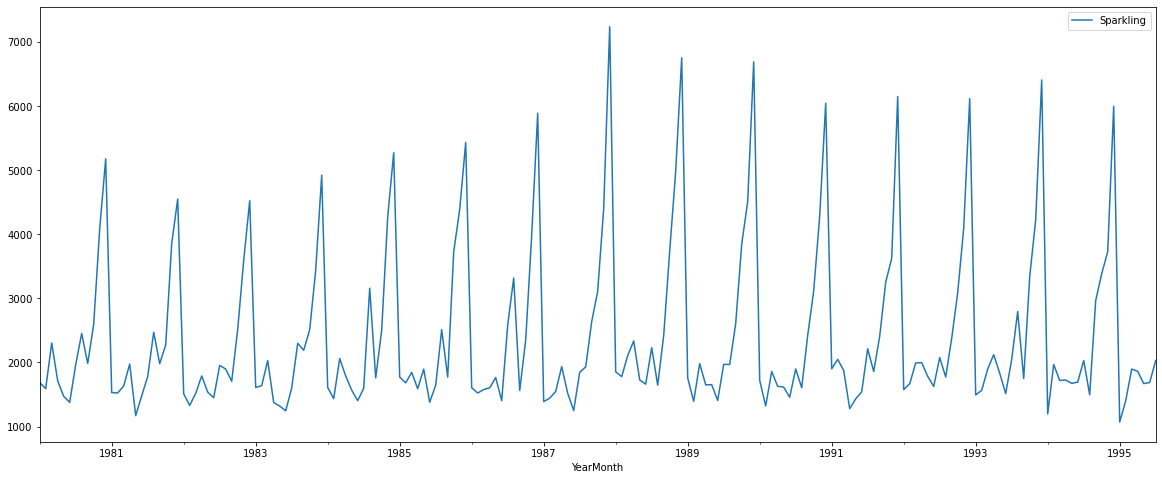

In [164]:
df.plot()

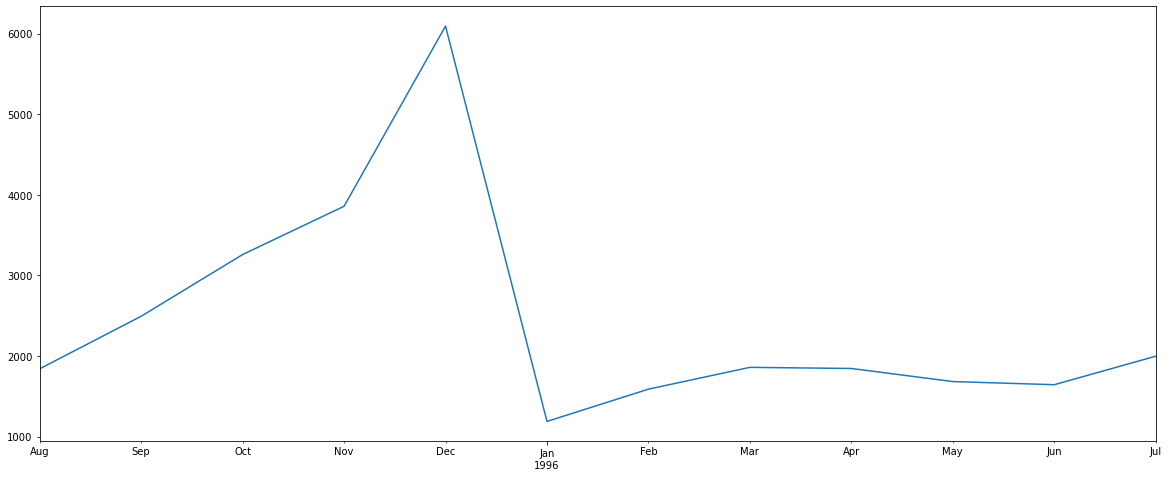

In [165]:
prediction_1.plot();

In [166]:
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(fullmodel1.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(fullmodel1.resid,ddof=1)})
pred_1_df.head()

,lower_CI,prediction,upper_ci
1995-08-01,1115.294418,1840.123906,2564.953393
1995-09-01,1766.966903,2491.796391,3216.625878
1995-10-01,2532.816875,3257.646362,3982.475850
1995-11-01,3131.839060,3856.668548,4581.498035
1995-12-01,5367.387315,6092.216803,6817.046290


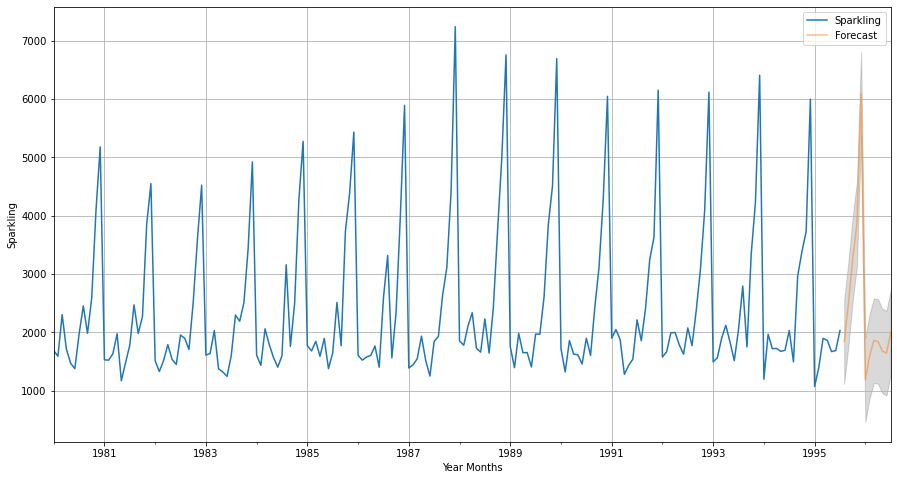

In [167]:
# plot the forecast along with the confidence band

axis = df.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.grid()
plt.show()

In [168]:
print(fullmodel1.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                Sparkling   No. Observations:                  187
Model:             ExponentialSmoothing   SSE                       25437537.698
Optimized:                         True   AIC                           2242.457
Trend:                         Additive   BIC                           2294.155
Seasonal:                      Additive   AICC                          2246.529
Seasonal Periods:                    12   Date:                 Fri, 04 Mar 2022
Box-Cox:                          False   Time:                         15:54:24
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.1000000                alpha                False
smoothing_trend          

In [171]:
resultsDf_14

,Test RMSE
Full Model,368.821926


                                                  The End